**Name: Aishwarya Bhavsar**<br>
**CECS 457 - Applied Machine Learning**<br>
**Bank Customer Churn** <br>
**Date:11/14/2022**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info

<bound method DataFrame.info of       customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  esti

In [5]:
df.describe(include='all')

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


**Check For Missing Values**

In [6]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [7]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

**Dropping irrelevant features**

In [9]:
df = df.drop(['customer_id'],axis=1)

In [11]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Encoding Categorical Data**

In [12]:
df = pd.get_dummies(df,drop_first = True)

In [13]:
df.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


**Insights about target variable**

In [15]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

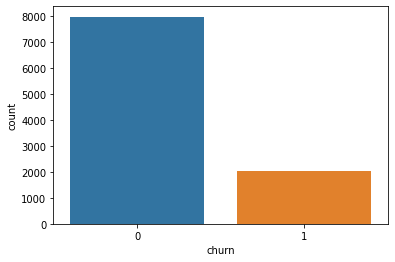

In [17]:
sns.countplot(df['churn'])

In [21]:
X = df.drop('churn',axis=1)
y = df['churn']

**The dataset is imbalanced hence we will use the Synthetic Minority Oversampling Technique(SMOTE)**

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [24]:
y_res.value_counts()

1    7963
0    7963
Name: churn, dtype: int64

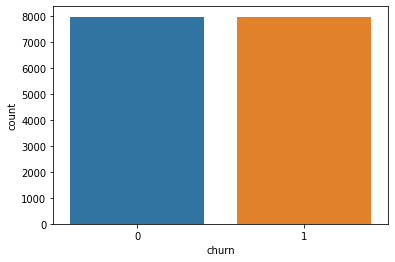

In [25]:
sns.countplot(y_res)

**Splitting The Dataset into Training Set and Test Set**

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=50)

**Feature Scaling**

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc = StandardScaler()

In [30]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
X_train

array([[ 1.25113013,  1.98997514, -1.40040898, ...,  1.74020991,
        -0.46320808, -0.84563956],
       [-0.71957364,  0.59414104,  1.16674649, ..., -0.57464332,
        -0.46320808, -0.84563956],
       [ 0.91360628,  1.49146296, -1.03367248, ..., -0.57464332,
        -0.46320808, -0.84563956],
       ...,
       [-0.19695607,  1.09265322, -1.03367248, ..., -0.57464332,
        -0.46320808, -0.84563956],
       [ 1.50155105, -0.40288332,  0.80001   , ..., -0.57464332,
        -0.46320808,  1.18253692],
       [-0.85022803,  0.09562886, -1.03367248, ...,  1.74020991,
        -0.46320808, -0.84563956]])

# **1. LOGISTIC REGRESSION**

In [32]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred1 = log.predict(X_test)

In [34]:
y_pred1

array([1, 1, 0, ..., 0, 0, 1])

**Accuracy**

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.7757408337518835

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score

**Precision Score**

In [37]:
precision_score(y_test,y_pred1)

0.7731804586241277

**Recall Score**

In [38]:
recall_score(y_test,y_pred1)

0.779788838612368

**f1 score**

In [39]:
f1_score(y_test,y_pred1)

0.7764705882352941

# **2. SVC**

In [40]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [41]:
y_pred2=svm.predict(X_test)

In [42]:
y_pred2

array([1, 1, 0, ..., 0, 0, 1])

**Accuracy**

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.8304871923656454

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score

**Precision Score**

In [46]:
precision_score(y_test,y_pred2)

0.8318181818181818

**Recall**

In [47]:
recall_score(y_test,y_pred2)

0.8280542986425339

**f1 score**

In [48]:
f1_score(y_test,y_pred2)

0.8299319727891156

# **3. KNeighbors Classifier**

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [50]:
y_pred3=knn.predict(X_test)

In [51]:
y_pred3

array([1, 1, 0, ..., 0, 0, 1])

**Accuracy**

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.8304871923656454

In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score

**Precision**

In [54]:
precision_score(y_test,y_pred3)

0.8000970402717128

**Recall**

In [55]:
recall_score(y_test,y_pred3)

0.8290598290598291

**f1 score**

In [56]:
f1_score(y_test,y_pred3)

0.814320987654321

# **4. Decision Tree**

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
y_pred4=dt.predict(X_test)
y_pred4

array([1, 1, 0, ..., 0, 0, 1])

**Accuracy**

In [59]:
accuracy_score(y_test, y_pred4)

0.7820190858864892

**Precision**

In [60]:
precision_score(y_test, y_pred4)

0.7735480722303563

**Recall**

In [61]:
recall_score(y_test, y_pred4)

0.7968828557063852

In [62]:
f1_score(y_test,y_pred4)

0.7850421000495295

# **5. Random Forest Classifier**

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [64]:
y_pred5=rf.predict(X_test)

In [65]:
y_pred5

array([1, 1, 0, ..., 0, 0, 1])

**Accuracy Score**

In [66]:
accuracy_score(y_test,y_pred5)

0.8463083877448518

**Precision Score**

In [67]:
precision_score(y_test, y_pred5)

0.8475517415446744

**Recall**

In [68]:
recall_score(y_test, y_pred5)

0.8441427853192559

**f1 score**

In [69]:
f1_score(y_test,y_pred5)

0.8458438287153652

# **6. Gradient Boost**

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [72]:
y_pred6=gbc.predict(X_test)

In [73]:
y_pred6

array([1, 1, 0, ..., 0, 0, 1])

**Accuracy**

In [74]:
accuracy_score(y_test,y_pred6)

0.8395278754394776

**Precision**

In [75]:
precision_score(y_test, y_pred6)

0.8447395301327886

**Recall**

In [76]:
recall_score(y_test, y_pred6)

0.8315736551030669

**f1 score**

In [77]:
f1_score(y_test,y_pred6)

0.8381048897897138

# **7. XGBoost**

In [78]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier(random_state=42, verbosity = 0)
model_xgb.fit(X_train, y_train)

XGBClassifier(random_state=42, verbosity=0)

In [79]:
y_pred7=model_xgb.predict(X_test)

**Accuracy**

In [80]:
accuracy_score(y_test,y_pred7)

0.8335007533902562

**Precision**

In [81]:
precision_score(y_test,y_pred7)

0.84

**Recall**

In [82]:
recall_score(y_test,y_pred7)

0.8235294117647058

**f1 score**

In [83]:
f1_score(y_test,y_pred7)

0.8316831683168315

# **Accuracy Summary**

In [84]:
performance_summary = pd.DataFrame({
    'Model':['LR','SVC','KNN','DT','RF','GBC','XGB'],
    'ACC':[accuracy_score(y_test,y_pred1),
           accuracy_score(y_test,y_pred2),
           accuracy_score(y_test,y_pred3),
           accuracy_score(y_test,y_pred4),
           accuracy_score(y_test,y_pred5),
           accuracy_score(y_test,y_pred6),
           accuracy_score(y_test,y_pred7)
          ]
})

In [85]:
performance_summary

,Model,ACC
0,LR,0.775741
1,SVC,0.830487
2,KNN,0.811150
3,DT,0.782019
4,RF,0.846308
5,GBC,0.839528
6,XGB,0.833501


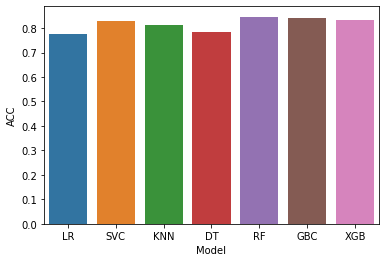

In [86]:
sns.barplot(performance_summary['Model'],performance_summary['ACC'])

In [87]:
performance_summary = pd.DataFrame({
    'Model':['LR','SVC','KNN','DT','RF','GBC','XGB'],
    'PRECISION':[precision_score(y_test,y_pred1),
           precision_score(y_test,y_pred2),
           precision_score(y_test,y_pred3),
           precision_score(y_test,y_pred4),
           precision_score(y_test,y_pred5),
           precision_score(y_test,y_pred6),
            precision_score(y_test,y_pred6)
          ]
})

In [88]:
performance_summary

,Model,PRECISION
0,LR,0.773180
1,SVC,0.831818
2,KNN,0.800097
3,DT,0.773548
4,RF,0.847552
5,GBC,0.844740
6,XGB,0.844740


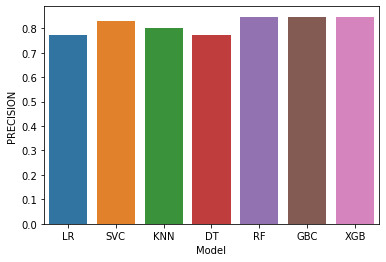

In [89]:
sns.barplot(performance_summary['Model'],performance_summary['PRECISION'])

**Saving the best model, XGBoost**

In [90]:
X_train = sc.fit_transform(X_train)

In [91]:
model_xgb.fit(X_res,y_res)

XGBClassifier(random_state=42, verbosity=0)

In [92]:
import joblib

In [93]:
joblib.dump(model_xgb, 'churn_predict_model')

['churn_predict_model']

In [94]:
model = joblib.load('churn_predict_model')

In [95]:
df.columns

Index(['credit_score', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn',
       'country_Germany', 'country_Spain', 'gender_Male'],
      dtype='object')

# **Conclusion:**

**We ran 7 models on this dataset and among all the 7, Gradient Boost Classifier has the highest accuracy of 83.95% and Random Forest has the highest precision of 84.75%**